#### Import library

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tkinter import *
from tkinter.ttk import Combobox
from tkinter import ttk

#### Read and Display Dataset(link: https://drive.google.com/file/d/1I0e5IECsbhqS-5kNacaCakPway3mL6ax/view?usp=share_link)

In [2]:
# Read in the CSV file and store the data in a Pandas dataframe
df = pd.read_csv("House.csv")

# Display the first five rows of the dataframe
df.head()

,ID House,House Age (years),Distance to Station (meters),Price per Square Foot
0,1,32.0,84.87882,75.8
1,2,19.5,306.59470,84.4
2,3,13.3,561.98450,94.6
3,4,13.3,561.98450,109.6
4,5,5.0,390.56840,86.2


#### Separate Column and Data

In [3]:
# Get a list of the column names in the dataframe
columns_header = df.columns.values.tolist()

# Print the values in the list columns_header
print(columns_header)

# Iterate through the column names and create a new variable for each column with the values from the dataframe
for i, j in enumerate(columns_header):
    # The new variables are named "x1", "x2", "x3", etc. corresponding to the column names in the dataframe
    globals()["x" + str(i+1)] = df[j].values.tolist()

# Print the values in the first column (saved as the "x1" variable)
print(x1)
# Print the values in the second column (saved as the "x2" variable)
print(x2)
# Print the values in the third column (saved as the "x3" variable)
print(x3)
# Print the values in the fourth column (saved as the "x4" variable)
print(x4)

['ID House', 'House Age (years)', 'Distance to Station (meters)', 'Price per Square Foot']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[32.0, 19.5, 13.3, 13.3, 5.0, 7.1, 34.5, 20.3, 31.7, 17.9, 34.8, 6.3, 13.0, 20.4, 13.2, 35.7, 0.0, 17.7, 16.9, 1.5, 4.5, 10.5, 14.7, 10.1, 39.6, 29.3, 3.1, 10.4, 19.2, 7.1, 25.9, 29.6, 37.9, 16.5, 15.4, 13.9, 14.7, 12.0, 3.1, 16.2, 13.6, 16.8, 36.1, 34.4, 2.7, 36.6, 21.7, 35.9, 24.2, 29.4]
[84.87882, 306.5947, 561.9845, 561.9845, 390.5684, 2175.03, 623.4731, 287.6025, 5512.038, 1783.18, 405.2134, 90.45606, 492.2313, 2469.645, 1164.838, 579.2083, 292.9978, 350.8515, 368.1363, 23.38284, 2275.877, 279.1726, 1360.139, 279.1726, 480.6977, 1487.868, 383.8624, 276.449, 557.478, 451.2438, 4519.69, 769.4034, 488.5727, 323.655, 205.367, 4079.418, 1935.009, 1360.139, 577.9615, 289.3248, 4082.015, 4066.587, 519.4617, 51

## Create a fuzzy membership function

In [4]:
# initialize empty list for storing input variables
him_var_in = []

# define some lists for fuzzy membership functions
ytrimf = [0,1,0]
ytrapmf1 = [1,1,1,0]
ytrapmf2 = [0,1,1,1]
ytrapmf3 = [0,1,1,0]
xtrimf = ['p','q','r']
xtrapmf = ['p','q','r','s']

In [5]:
# Get the number of variables in the data (minus the target variable)
jum_var_in = len(columns_header) - 1

# Print the number of variables in the data
print(jum_var_in)


3


In [6]:
# Create an empty list to store the input variables and the number of membership functions for each input variable
var_in = []

# Iterate through the input variables
for i in range(jum_var_in):
    x = []  # Temporary list to store the current input variable and the number of membership functions
    
    # Add the name of the current input variable to the list
    x.append(columns_header[i+1])
    
    # Prompt the user to enter the number of membership functions for the current input variable
    while True:
        try:
            b = int(input(f'Enter how many sets of variables there are {columns_header[i+1]}: '))
        except ValueError:  # Handle non-integer input
            print('Do not enter a value other than an integer')
            continue
        if b < 1:  # Ensure that at least one membership function is specified
            print("Enter at least 1")
            continue
        else:
            break
    
    # Add the number of membership functions for the current input variable to the list
    x.append(b)
    
    # Add the current input variable and the number of membership functions to the list of input variables
    var_in.append(x)

# Print the list of input variables and the number of membership functions for each input variable
print(var_in)


Enter how many sets of variables there are House Age (years): 2
Enter how many sets of variables there are Distance to Station (meters): 3
Enter how many sets of variables there are Price per Square Foot: 3
[['House Age (years)', 2], ['Distance to Station (meters)', 3], ['Price per Square Foot', 3]]


Enter the name of the set of variables House Age (years) to 1: New
New, enter numbers 1(TRIMF), 2(TRAPMF): 2
Enter the domain parameter TRAPMF[p,q,r,s] for New: 
Enter value p: 0
Enter value q: 0
Enter value r: 8
Enter value s: 24


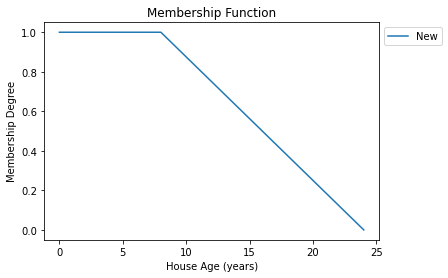

Enter the name of the set of variables House Age (years) to 2: Old
Old, enter numbers 1(TRIMF), 2(TRAPMF): 2
Enter the domain parameter TRAPMF[p,q,r,s] for Old: 
Enter value p: 8
Enter value q: 24
Enter value r: 40
Enter value s: 40


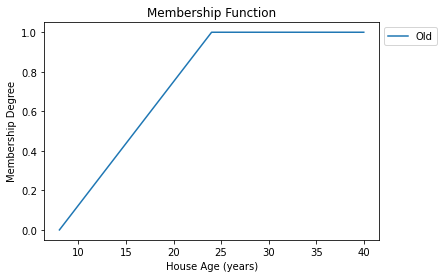

Enter the name of the set of variables Distance to Station (meters) to 1: Near
Near, enter numbers 1(TRIMF), 2(TRAPMF): 2
Enter the domain parameter TRAPMF[p,q,r,s] for Near: 
Enter value p: 0
Enter value q: 0
Enter value r: 1000
Enter value s: 3000


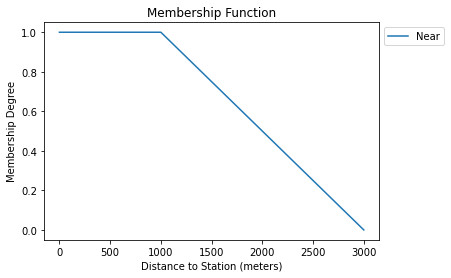

Enter the name of the set of variables Distance to Station (meters) to 2: Medium
Medium, enter numbers 1(TRIMF), 2(TRAPMF): 1
Enter the TRIMF[p,q,r] parameter domain for Medium: 
Enter value p: 1000
Enter value q: 3000
Enter value r: 5000


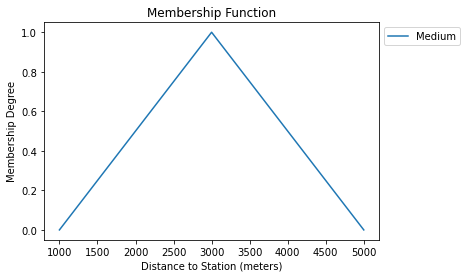

Enter the name of the set of variables Distance to Station (meters) to 3: Far
Far, enter numbers 1(TRIMF), 2(TRAPMF): 2
Enter the domain parameter TRAPMF[p,q,r,s] for Far: 
Enter value p: 3000
Enter value q: 5000
Enter value r: 7000
Enter value s: 7000


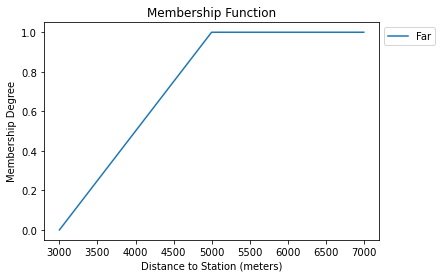

Enter the name of the set of variables Price per Square Foot to 1: Cheap
Cheap, enter numbers 1(TRIMF), 2(TRAPMF): 2
Enter the domain parameter TRAPMF[p,q,r,s] for Cheap: 
Enter value p: 20
Enter value q: 20
Enter value r: 50
Enter value s: 80


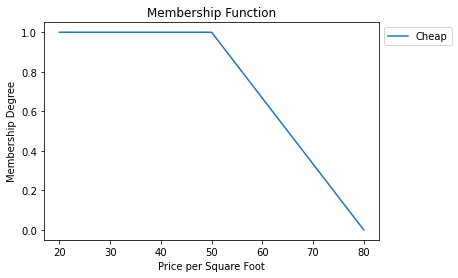

Enter the name of the set of variables Price per Square Foot to 2: Reasonable
Reasonable, enter numbers 1(TRIMF), 2(TRAPMF): 1
Enter the TRIMF[p,q,r] parameter domain for Reasonable: 
Enter value p: 50
Enter value q: 80
Enter value r: 110


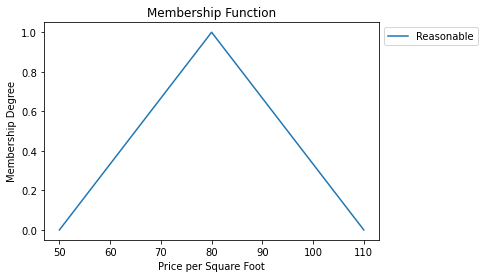

Enter the name of the set of variables Price per Square Foot to 3: Expensive
Expensive, enter numbers 1(TRIMF), 2(TRAPMF): 2
Enter the domain parameter TRAPMF[p,q,r,s] for Expensive: 
Enter value p: 80
Enter value q: 110
Enter value r: 150
Enter value s: 150


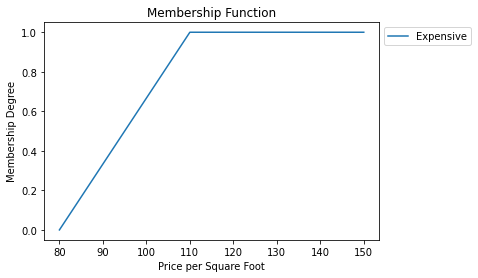

[[['New', 2, [0.0, 0.0, 8.0, 24.0]], ['Old', 2, [8.0, 24.0, 40.0, 40.0]]], [['Near', 2, [0.0, 0.0, 1000.0, 3000.0]], ['Medium', 1, [1000.0, 3000.0, 5000.0]], ['Far', 2, [3000.0, 5000.0, 7000.0, 7000.0]]], [['Cheap', 2, [20.0, 20.0, 50.0, 80.0]], ['Reasonable', 1, [50.0, 80.0, 110.0]], ['Expensive', 2, [80.0, 110.0, 150.0, 150.0]]]]


In [7]:
# loop through each input variable
for i in var_in:
    # initialize empty list for storing membership function information for current input variable
    x = []
    # loop through number of membership functions for current input variable
    for j in range(i[1]):
        # initialize empty list for storing current membership function information
        y = []
        # loop until user provides a valid membership function name
        while True:
            try:
                # ask user for membership function name
                a = input(f'Enter the name of the set of variables {i[0]} to {j+1}: ')
            except:
                # handle invalid input
                continue
            # check if membership function name has already been used
            for k in x:
                if a in k:
                    print('Variable set names cannot be the same')
                    break
            else:
                # exit loop with valid input
                break
        # add membership function name to current membership function list
        y.append(a)
        # loop until user provides a valid membership function type (1 for TRIMF, 2 for TRAPMF)
        while True:
            try:
                # ask user for membership function type
                b = int(input(f'{a}, enter numbers 1(TRIMF), 2(TRAPMF): '))
            except ValueError:
                # handle invalid input (non-integer)
                print('Do not enter a value other than an integer')
                continue
            if b != 1 and b != 2:
                # handle invalid input (membership function type is not 1 or 2)
                print('Enter the correct number 1 or 2')
                continue
            else:
                # exit loop with valid input
                break
        # add membership function type to current membership function list
        y.append(b)
        # if membership function is TRIMF
        if b == 1:
            # ask user for domain parameters for TRIMF membership function
            print(f'Enter the TRIMF[p,q,r] parameter domain for {a}: ')
            # initialize empty list for storing domain parameters
            z = []
            # loop through domain parameters for TRIMF membership function
            for k in xtrimf:
                # loop until user provides a valid domain parameter value
                while True:
                    try:
                        # ask user for domain parameter value
                        while True:
                            try:
                                c = float(input(f'Enter value {k}: '))
                            except ValueError:
                                # handle invalid input (non-float)
                                print('Do not enter a value other than an float')
                            else:
                                # exit inner loop with valid input
                                break
                    except:
                        # handle invalid input
                        continue
                    # add domain parameter value to list of domain parameters
                    z.append(c)
                    # check if domain parameters are in increasing order
                    if z != sorted(z):
                        print('unordered domains')
                        # reset list of domain parameters
                        z = []
                        # continue outer loop to ask for domain parameter values again
                        continue
                    else:
                        # exit inner loop with valid input
                        break
            # set plot title and axis labels
            plt.title("Membership Function")
            plt.xlabel(i[0])
            plt.ylabel("Membership Degree")
            # plot TRIMF membership function
            plt.plot(z,ytrimf,label=a)
            # place legend outside plot area
            plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
            # display plot
            plt.show()
        # if membership function is TRAPMF
        if b == 2:
            # ask user for domain parameters for TRAPMF membership function
            print(f'Enter the domain parameter TRAPMF[p,q,r,s] for {a}: ')
            # initialize empty list for storing domain parameters
            z = []
            # loop until user provides valid domain parameter values for TRAPMF membership function
            while True:
                try:
                    # loop through domain parameters for TRAPMF membership function
                    for k in xtrapmf:
                        # loop until user provides a valid domain parameter value
                        while True:
                            try:
                                # ask user for domain parameter value
                                c = float(input(f'Enter value {k}: '))
                            except ValueError:
                                # handle invalid input (non-integer)
                                print('Do not enter a value other than an float')
                            else:
                                # exit inner loop with valid input
                                break
                        # add domain parameter value to list of domain parameters
                        z.append(c)
                except:
                    # handle invalid input
                    continue
                # check if domain parameters are in increasing order
                if z != sorted(z):
                    print('unordered domains')
                    # reset list of domain parameters
                    z = []
                    # continue outer loop to ask for domain parameter values again
                    continue
                else:
                    # exit outer loop with valid input
                    break
            # plot appropriate TRAPMF membership function based on domain parameters
            if z[0] == z[1]:
                # set plot title and axis labels
                plt.title("Membership Function")
                plt.xlabel(i[0])
                plt.ylabel("Membership Degree")
                # plot TRAPMF membership function
                plt.plot(z,ytrapmf1,label=a)
                # place legend outside plot area
                plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
                plt.show()
            elif z[2] == z[3]:
                # set plot title and axis labels
                plt.title("Membership Function")
                plt.xlabel(i[0])
                plt.ylabel("Membership Degree")
                # plot TRAPMF membership function
                plt.plot(z,ytrapmf2,label=a)
                # place legend outside
                plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
                # display plot
                plt.show()
            else:
                # set plot title and axis labels
                plt.title("Membership Function")
                plt.xlabel(i[0])
                plt.ylabel("Membership Degree")
                # plot TRAPMF membership function
                plt.plot(z,ytrapmf3,label=a)
                # place legend outside plot area
                plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
                # display plot
                plt.show()
        # add domain parameters to current membership function list
        y.append(z)
        # add current membership function list to list of membership functions for current input variable
        x.append(y)
    # add list of membership functions for current input variable to list of all membership functions
    him_var_in.append(x)

# print list of all membership functions
print(him_var_in)

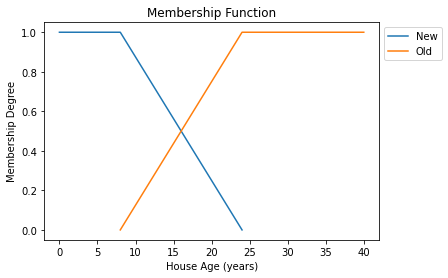

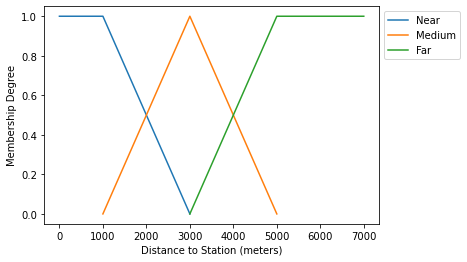

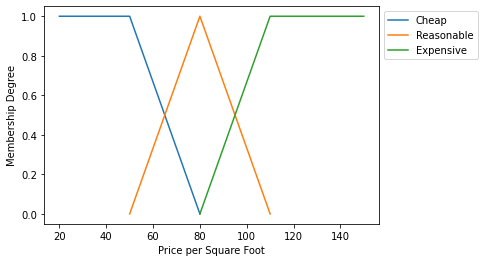

In [8]:
# set plot title
plt.title("Membership Function")
# loop through each input variable and its associated membership functions
for count,i in enumerate(var_in):
    # set x-axis label as input variable name
    plt.xlabel(i[0])
    # set y-axis label
    plt.ylabel("Membership Degree")
    # loop through membership functions for current input variable
    for j in range(len(him_var_in[count])):
        # if membership function is TRIMF
        if him_var_in[count][j][1] == 1:
            # plot TRIMF membership function
            plt.plot(him_var_in[count][j][2],ytrimf,label=him_var_in[count][j][0])
        # if membership function is TRAPMF
        elif him_var_in[count][j][1] == 2:
            # plot appropriate TRAPMF membership function based on domain parameters
            if him_var_in[count][j][2][0] == him_var_in[count][j][2][1]:
                plt.plot(him_var_in[count][j][2],ytrapmf1,label=him_var_in[count][j][0])
            # if membership function is TRAPMF with domain parameters [p,q,r,s] such that p=q
            elif him_var_in[count][j][2][2] == him_var_in[count][j][2][3]:
                # plot TRAPMF membership function
                plt.plot(him_var_in[count][j][2],ytrapmf2,label=him_var_in[count][j][0])
            # if membership function is TRAPMF with domain parameters [p,q,r,s] such that p!=q and r!=s
            else:
                # plot TRAPMF membership function
                plt.plot(him_var_in[count][j][2],ytrapmf3,label=him_var_in[count][j][0])
    # place legend outside plot area
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left')
    # display plot
    plt.show()

In [9]:
# Initialize empty list to store the names of the sets of input variables
choices_in = []

# Iterate over each set of input variables
for i in him_var_in:
    # Initialize empty list to store the names of the variables in the current set
    a = []
    # Iterate over each variable in the current set
    for j in i:
        # Add the name of the current variable to the list
        a.append(j[0])
    # Add the list of variable names for the current set to the list of all sets of input variables
    choices_in.append(a)

# Print the list of all sets of input variables
print(choices_in)

# Initialize empty list to store the domains of the sets of input variables
domain_in = []

# Iterate over each set of input variables
for i in him_var_in:
    # Initialize empty list to store the domains of the variables in the current set
    b = []
    # Iterate over each variable in the current set
    for j in i:
        # Add the domain of the current variable
        b.append(j[2])
    # Add the list of domains for the current set to the list of all sets of input variables
    domain_in.append(b)

# Print the list of domains for all sets of input variables
print(domain_in)

[['New', 'Old'], ['Near', 'Medium', 'Far'], ['Cheap', 'Reasonable', 'Expensive']]
[[[0.0, 0.0, 8.0, 24.0], [8.0, 24.0, 40.0, 40.0]], [[0.0, 0.0, 1000.0, 3000.0], [1000.0, 3000.0, 5000.0], [3000.0, 5000.0, 7000.0, 7000.0]], [[20.0, 20.0, 50.0, 80.0], [50.0, 80.0, 110.0], [80.0, 110.0, 150.0, 150.0]]]


#### Look for the Membership Degree value for each Data for each Column based on the Membership Function that is created

In [11]:
# Iterate through the domain values for each input variable
for i, j in enumerate(domain_in):
    # Create a new empty list for each input variable
    globals()["y" + str(i+1)] = []
    
    # Iterate through the domain values for each membership function of the input variable
    for k in range(len(j)):
        temp = []  # Temporary list to store membership values for each data point
        
        # If the membership function has 4 parameters (triangular function)
        if len(j[k]) == 4:
            # Check if the membership function is a left-sided triangle
            if j[k][0] == j[k][1]:
                # Iterate through the values in the input variable
                for l in globals()["x" + str(i+2)]:
                    ytemp = []  # Temporary variable to store the membership value for the current data point
                    
                    # Calculate the membership value for the current data point based on the membership function parameters
                    if l >= j[k][-1]:  # Value is above the highest point of the triangle
                        ytemp = 0
                    elif l <= j[k][2]:  # Value is below the lowest point of the triangle
                        ytemp = 1
                    else:  # Value is between the highest and lowest points of the triangle
                        ytemp = max(min(1,(j[k][3]-l)/(j[k][3]-j[k][2])),0)
                    temp.append(ytemp)
            # Check if the membership function is a right-sided triangle
            elif j[k][2] == j[k][3]:
                # Iterate through the values in the input variable
                for l in globals()["x" + str(i+2)]:
                    ytemp = []  # Temporary variable to store the membership value for the current data point
                    
                    # Calculate the membership value for the current data point based on the membership function parameters
                    if l <= j[k][0]:  # Value is below the lowest point of the triangle
                        ytemp = 0
                    elif l >= j[k][1]:  # Value is above the highest point of the triangle
                        ytemp = 1
                    else:  # Value is between the highest and lowest points of the triangle
                        ytemp = max(min((l-j[k][0])/(j[k][1]-j[k][0]),1),0)
                    temp.append(ytemp)
            # Membership function is a regular triangle (not left- or right-sided)
            else:
                # Iterate through the values in the input variable
                for l in globals()["x" + str(i+2)]:
                    ytemp = []  # Temporary variable to store the membership value for the current data point
                    
                    # Calculate the membership value for the current data point based on the membership function parameters
                    if l >= j[k][-1]:  # Value is above the highest point of the triangle
                        ytemp = 0
                    elif l <= j[k][0]:  # Value is below the lowest point of the triangle
                        ytemp = 0
                    else:  # Value is between the highest and lowest points of the triangle
                        ytemp = max(min((l-j[k][0])/(j[k][1]-j[k][0]),1,(j[k][3]-l)/(j[k][3]-j[k][2])),0)
                    temp.append(ytemp)
        # If the membership function has 3 parameters (trapezoid function)
        elif len(j[k]) == 3:
            # Iterate through the values in the input variable
            for l in globals()["x" + str(i+2)]:
                ytemp = []  # Temporary variable to store the membership value for the current data point
                
                # Calculate the membership value for the current data point based on the membership function parameters
                if l >= j[k][-1]:  # Value is above the highest point of the trapezoid
                    ytemp = 0
                elif l <= j[k][0]:  # Value is below the lowest point of the trapezoid
                    ytemp = 0
                else:  # Value is between the highest and lowest points of the trapezoid
                    ytemp = max(min((l-j[k][0])/(j[k][1]-j[k][0]),(j[k][2]-l)/(j[k][2]-j[k][1])),0)
                temp.append(ytemp)
        
        # Add the membership values for the current membership function to the list for the current input variable
        globals()["y" + str(i+1)].append(temp)

# Iterate through the input variables
for i in range(len(choices_in)):
    # Create a new Pandas dataframe for the current input variable with the column containing the values of the input variable
    globals()["ytabel" + str(i+1)] = pd.DataFrame(df[columns_header[i+1]])
    
    # Iterate through the membership functions for the current input variable
    for j in range(len(choices_in[i])):
        # Add a new column to the dataframe for the current membership function with the corresponding membership values
        globals()["ytabel" + str(i+1)][choices_in[i][j]] = globals()["y" + str(i+1)][j]
    
    # Print the dataframe for the current input variable
    print(globals()["ytabel" + str(i+1)])
    print()  # Add a blank line for readability


    House Age (years)      New      Old
0                32.0  0.00000  1.00000
1                19.5  0.28125  0.71875
2                13.3  0.66875  0.33125
3                13.3  0.66875  0.33125
4                 5.0  1.00000  0.00000
5                 7.1  1.00000  0.00000
6                34.5  0.00000  1.00000
7                20.3  0.23125  0.76875
8                31.7  0.00000  1.00000
9                17.9  0.38125  0.61875
10               34.8  0.00000  1.00000
11                6.3  1.00000  0.00000
12               13.0  0.68750  0.31250
13               20.4  0.22500  0.77500
14               13.2  0.67500  0.32500
15               35.7  0.00000  1.00000
16                0.0  1.00000  0.00000
17               17.7  0.39375  0.60625
18               16.9  0.44375  0.55625
19                1.5  1.00000  0.00000
20                4.5  1.00000  0.00000
21               10.5  0.84375  0.15625
22               14.7  0.58125  0.41875
23               10.1  0.86875  0.13125


## Create a GUI

In [95]:
# Create main window and set title and background color
root = Tk()
root.title("Recommend a House")
root.configure(bg='GRAY')

# Set global variable 'count' to 0
globals()[count] = 0

# Define function to show table based on user's selections
def show_table():
    # If 'count' is 0, set it to 1
    if globals()[count] == 0:
        globals()[count] += 1
    # If 'count' is not 0, destroy previous table and scrollbar
    else:
        try:
            globals()["tree"].destroy()
            globals()["scroll"].destroy()
        except:
            pass

    # Initialize list to store new column headers based on user's selections
    new_columns_header = []

    # Get user's selection for operator
    op = varin0.get()
    # Loop through all choices and get user's selections
    for i in range(len(choices_in)):
        globals()["var" + str(i + 1)] = globals()["varin" + str(i + 1)].get()
        # Add selected choice to list of new column headers
        new_columns_header.append(globals()["var" + str(i + 1)])

    # Create new data frame with all columns from original data frame
    datashow = pd.DataFrame([])
    for i in columns_header:
        datashow[i] = df[i].values.tolist()
    # Add new columns based on user's selections
    for i,j in enumerate(new_columns_header):
        if j == 'None':
            continue
        else:
            datashow[j] = globals()["ytabel" + str(i+1)][j].values.tolist()

    # Filter data frame based on user's selection for operator
    if op == 'AND':
        # Drop all columns except for the first (original) one
        datashow = datashow.drop([columns_header[0]], axis=1)
        # Create a new column with the minimum value for each row across all columns
        datashow['AND'] = datashow.min(axis=1)
        # Add the first (original) column back to the data frame
        datashow[columns_header[0]] = df[columns_header[0]].values.tolist()
        # Filter the data frame to include only rows where the minimum value is greater than 0
        datashow = datashow[datashow['AND'] > 0]
        # Sort the data frame by the 'AND' column in descending order
        datashow = datashow.sort_values(by=['AND'], ascending=False)
    # If the 'OR' operator is selected
    elif op == 'OR':
        # Loop through all columns and drop them from the data frame
        for i in range(len(columns_header)):
            datashow = datashow.drop([columns_header[i]], axis=1)
        # Create a new column with the maximum value for each row across all columns
        datashow['OR'] = datashow.max(axis=1)
        # Add the first (original) column back to the data frame
        datashow[columns_header[0]] = df[columns_header[0]].values.tolist()
        # Filter the data frame to include only rows where the maximum value is greater than 0
        datashow = datashow[datashow['OR'] > 0]
        # Sort the data frame by the 'OR' column in descending order
        datashow = datashow.sort_values(by=['OR'], ascending=False)

    # Initialize list to store column names to show in table
    show_columns = []
    # Add column names from filtered data frame to list
    show_columns = datashow.columns.values.tolist()
    # Convert data frame to array
    datat = np.array(datashow)

    # Create treeview widget to display table
    globals()["tree"] = ttk.Treeview(frame, columns = show_columns, height = len(datat), show = "headings")
    # Pack treeview widget
    globals()["tree"].pack(anchor=CENTER)
    # Add column headers to treeview widget
    for i in range(len(show_columns)):
        globals()["tree"].heading(i, text=show_columns[i])
    # Set width of each column in treeview widget
    for i in range(len(show_columns)):
        globals()["tree"].column(i, width = 100)
    # Add rows to treeview widget
    for i in datat:
        val = tuple(i)
        globals()["tree"].insert('', 'end', values = val)

    # Create scrollbar widget
    globals()["scroll"] = ttk.Scrollbar(frame, orient="vertical", command=globals()["tree"].yview)
    # Pack scrollbar widget
    globals()["scroll"].pack(side = 'right', fill = 'y')
    # Set treeview widget to respond to scrollbar
    globals()["tree"].configure(yscrollcommand=globals()["scroll"].set)

# Create frame to hold GUI elements
frames = Frame(root)
frames.pack()

# Create bottom frame to hold 'Show Table' button
bottomframe = Frame(root)
bottomframe.pack(anchor=CENTER)

# Create label and dropdown menu for operator selection
varLabel0 = Label(frames, text=f'Operator')
varLabel0.pack(side=LEFT, padx=5, pady=5)
varin0 = Combobox(frames, width = 27, textvariable = StringVar())
varin0['values'] = ['AND','OR']
varin0.pack(side=LEFT, padx=5, pady=5)
varin0.current(0)

# Create labels and comboboxes for choice selections
for i in range(len(choices_in)):
    globals()["varLabel" + str(i + 1)] = Label(frames, text=f'{columns_header[i+1]}')
    globals()["varLabel" + str(i + 1)].pack(side=LEFT, padx=5, pady=5)
    boxtemp = [None]
    globals()["varin" + str(i + 1)] = Combobox(frames, width = 27, textvariable = StringVar())
    for j in choices_in[i]:
        boxtemp.append(j)
    globals()["varin" + str(i + 1)]['values'] = boxtemp
    globals()["varin" + str(i + 1)].pack(side=LEFT, padx=5, pady=5)
    globals()["varin" + str(i + 1)].current(0)

# Create 'Show Table' button and set command to show_table function
button = Button(bottomframe, text="Show Table", command=show_table)
button.pack(anchor=CENTER, pady=5)

# Create a new frame
frame = Frame(bottomframe)
frame.pack(ipadx=20, ipady=20, side=BOTTOM)

# Create main loop to run GUI
root.mainloop()


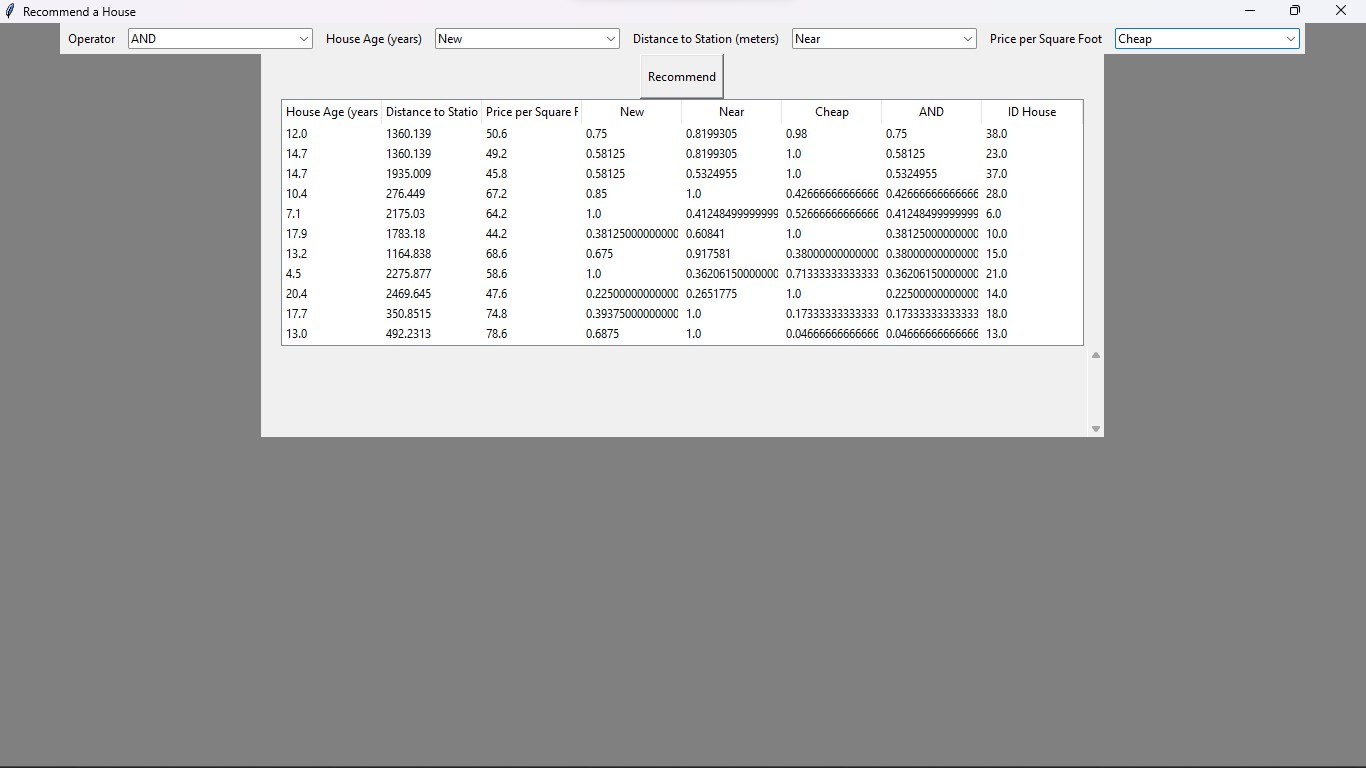